# Web Caricature Processing

Unfortunately, this dataset is not publically available. You will have to request access to the dataset: https://cs.nju.edu.cn/rl/WebCaricature.htm

Download the WebCaricature Dataset and place in the root directory of your project folder. Set is_processed below to False when you process the file.

The following code extracts all the images and coordinate files from their subfolders, renames the files with a prefix and moves them to a top level folder.

The dataset contains faces and caricatures of different celebrities. Each celebrity is present in both faces and caricature data sets (although the images are not paired in anyway.) There are many caricatures and faces of each celebrity. 


In [15]:
import os
import shutil
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Break-Out Folder Structure

Each celebrity has their own folder for landmarks and image files for both caricatures and faces. We will break this out and store them in the following new folder heiarchy'images_A', 'images_B', 'coords_A' and 'coords_B'

In [17]:
# define directories to be worked with
filenames = 'WebCaricature/Filenames'
landmarks = 'WebCaricature/FacialPoints'
images = 'WebCaricature/OriginalImages'

# define new directories
images_faces = 'images_A_pre'
images_caricatures = 'images_B_pre'
coords_faces = 'coords_A_pre'
coords_caricatures = 'coords_B_pre'

if not os.path.exists(images_faces):
    os.mkdir(images_faces)
if not os.path.exists(images_caricatures):
    os.mkdir(images_caricatures)
if not os.path.exists(coords_faces):
    os.mkdir(coords_faces)
if not os.path.exists(coords_caricatures):
    os.mkdir(coords_caricatures)

is_processed = True
    
if not is_processed:  
    for folder in os.listdir(filenames):
        if folder != '.DS_Store':
            for file_file_names in os.listdir(os.path.join(filenames ,folder)):

                file_type = file_file_names.split('.txt')[0].split('_')[1]

                for file in file_file_names:

                    with open(os.path.join(filenames ,folder, file_file_names), 'r') as fp:

                        file_names_ = fp.read().splitlines()
                        for file_name in file_names_:

                            file_name = file_name.split('.')[0]

                            if file_type == 'p':
                                old_image_path = os.path.join(images ,folder, file_name + '.jpg')
                                old_coords_path = os.path.join(landmarks ,folder, file_name + '.txt')


                                new_image_name = folder.lower().replace(' ', '_').replace('.', '') + '_' + file_name + '.jpg'
                                new_coords_name = folder.lower().replace(' ', '_').replace('.', '')  + '_' + file_name + '.txt'

                                new_image_path = os.path.join(images_faces, new_image_name)
                                new_coords_path = os.path.join(coords_faces, new_coords_name)

                                # copy and rename in directory
                                shutil.copy(old_image_path, new_image_path)
                                shutil.copy(old_coords_path, new_coords_path)

                            elif file_type == 'c':

                                old_image_path = os.path.join(images ,folder, file_name + '.jpg')
                                old_coords_path = os.path.join(landmarks ,folder, file_name + '.txt')

                                new_image_name = folder.lower().replace(' ', '_').replace('.', '')  + '_' + file_name + '.jpg'
                                new_coords_name = folder.lower().replace(' ', '_').replace('.', '')  + '_' + file_name + '.txt'

                                new_image_path = os.path.join(images_caricatures, new_image_name)
                                new_coords_path = os.path.join(coords_caricatures, new_coords_name)

                                # copy and rename in directory
                                shutil.copy(old_image_path, new_image_path)
                                shutil.copy(old_coords_path, new_coords_path)

                            else:
                                print('error file ending')

                    fp.close()

### Coordinates to Usable Format

Now we have all the files in one place lets start to get them into a format we can work with. The following two cells process the coordinates contained in individual text files into a dataframe. Each row's index is the corresponding image file name. Each row is the coordinate set transformed into a 1d vector. 

We also add in here three extra landmarks for the purposes of affine transofmation. Nothing fancy, just using what we have.

<img src='Landmarks_black.jpg'>

In [18]:
is_processed = False

coords_dict = {}

for file in os.listdir(coords_faces):
    corresponding_image = file.split('.')[0] + '.jpg'
    if file != '.DS_Store':
        with open(os.path.join(coords_faces ,file), 'r') as fp:
            coord_list = []

            coords = fp.read().splitlines()
            for coord in coords:
                coord = coord.split(' ')
                coord[0] = float(coord[0])
                coord[1] = float(coord[1])
                coord_list.append(coord)

            ## centre left eye
            left_eye_centre = ([((coord_list[8][0] + coord_list[9][0])/2.0), 
                              ((coord_list[8][1] + coord_list[9][1])/2.0)])
            coord_list.append(left_eye_centre)


            ## centre right eye
            right_eye_centre = ([((coord_list[10][0] + coord_list[11][0])/2.0), 
                              ((coord_list[10][1] + coord_list[11][1])/2.0)])
            coord_list.append(right_eye_centre)

            ## centre mouth
            mouth_centre = ([((coord_list[13][0] + coord_list[15][0])/2.0), 
                              ((coord_list[13][1] + coord_list[15][1])/2.0)])
            coord_list.append(mouth_centre)

            coord_arr = np.array(coord_list).ravel() 
            coords_dict[corresponding_image] = coord_arr
            
coord_faces_df = pd.DataFrame(coords_dict).transpose()
coord_faces_df = coord_faces_df.sort_index()       
    

In [19]:
coords_dict = {}

for file in os.listdir(coords_caricatures):
    corresponding_image = file.split('.')[0] + '.jpg'
    if file != '.DS_Store':
        with open(os.path.join(coords_caricatures ,file), 'r') as fp:
            coord_list = []
            coords = fp.read().splitlines()
            for coord in coords:
                coord = coord.split(' ')
                coord[0] = float(coord[0])
                coord[1] = float(coord[1])
                coord_list.append(coord)

            ## centre left eye
            left_eye_centre = ([((coord_list[8][0] + coord_list[9][0])/2.0), 
                              ((coord_list[8][1] + coord_list[9][1])/2.0)])
            coord_list.append(left_eye_centre)


            ## centre right eye
            right_eye_centre = ([((coord_list[10][0] + coord_list[11][0])/2.0), 
                              ((coord_list[10][1] + coord_list[11][1])/2.0)])
            coord_list.append(right_eye_centre)

            ## centre mouth
            mouth_centre = ([((coord_list[13][0] + coord_list[15][0])/2.0), 
                              ((coord_list[13][1] + coord_list[15][1])/2.0)])


            coord_list.append(mouth_centre)
            coord_arr = np.array(coord_list).ravel() 
            coords_dict[corresponding_image] = coord_arr

coord_cari_df = pd.DataFrame(coords_dict).transpose()
coord_cari_df = coord_cari_df.sort_index()   

Let's check to see if we can accurately retrieve our coordinates from the dataFrames we have just created.

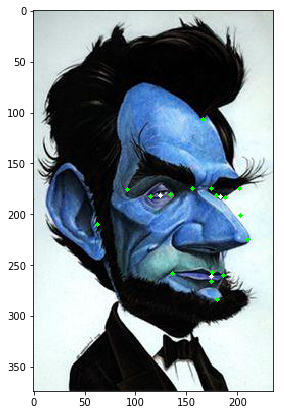

In [21]:
file = 'abraham_lincoln_C00001.jpg'

coords = coord_cari_df.loc[file].to_numpy().reshape(20,2)

image = cv2.imread('images_B/' + file)

for i, coord in enumerate(coords):
    if i in range(17,20):
        x = int(coord[0])
        y = int(coord[1])
        cv2.circle(image, (x, y), 2, (255, 255, 255), -1)
        
    else:
        x = int(coord[0])
        y = int(coord[1])
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
        #cv2.putText(image, str(i), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255))

plt.figure(figsize = (7,7))
plt.imshow(image);

### Crop and Scale

Good, now we need to crop and scale these images so they are all of the same dimension. The coordinates we have just extracted will also need to be transformed. We will go through this with one example.

678
-678 -678
297 975 9 687


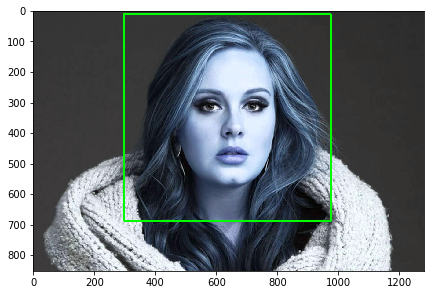

In [133]:
file = 'adele_laurie_blue_adkins_P00032.jpg'
coords = coord_faces_df.loc[file].to_numpy().reshape(20,2)
image = cv2.imread('images_A/' + file)

coords = coord_faces_df.loc[file].to_numpy().reshape(20,2)


# landmark min/max
xmin, xmax = int(coords[:,:1].min()), int(coords[:,:1].max())
ymin, ymax = int(coords[:,1:].min()), int(coords[:,1:].max())


# scaling
horiz_scale = 0.5
vert_scale = 0.5

# find origin and width of crop
crop_width = (xmax - xmin) * (1.0 + horiz_scale)
crop_height = (ymax - ymin) * (1.0 + vert_scale)
crop_square = int(max(crop_width, crop_height))

xmin_new = int(((xmin+xmax)/2.0) - (crop_square/2.0))
xmax_new = int(((xmin+xmax)/2.0) + (crop_square/2.0))
ymin_new = int(((ymin+ymax)/2.0) - (crop_square/2.0))
ymax_new = int(((ymin+ymax)/2.0) + (crop_square/2.0))


print(crop_square)
print(xmin_new - xmax_new, ymin_new - ymax_new)
print(xmin_new, xmax_new, ymin_new, ymax_new)

cv2.rectangle(image, (xmin_new, ymin_new), (xmax_new, ymax_new), (0, 255, 0), 3)



plt.figure(figsize = (7,7))
plt.imshow(image)

(678, 678, 3)


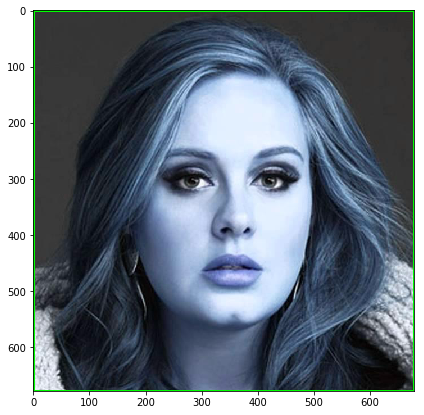

In [134]:
image_crop = image[max(ymin_new,0):ymax_new, max(xmin_new,0):xmax_new]

plt.figure(figsize = (7,7))
plt.imshow(image_crop)

print(image_crop.shape)

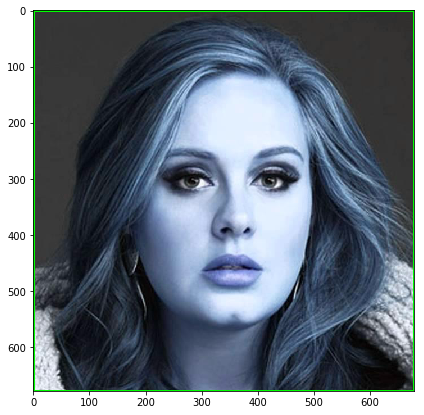

In [135]:

image_square = np.zeros((crop_square,crop_square,3), np.uint8)

image.shape[0]

#
#This does the job
#
image_square[0:min(image_crop.shape[0],crop_square),0:min(image_crop.shape[1],crop_square)] = image_crop[:,:]


plt.figure(figsize = (7,7))
plt.imshow(image_square)


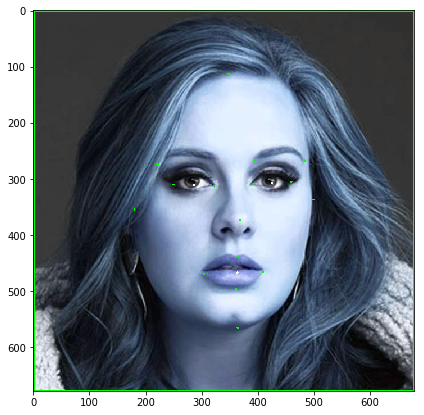

In [136]:
# translate coordinates


# plot coordinates on image_square
coords_new = + coords - [max(xmin_new,0), max(ymin_new,0)]

image_square_resize = image_square.copy()


for i, coord in enumerate(coords_new):
    if i in range(17,20):
        x = int(coord[0])
        y = int(coord[1])
        cv2.circle(image_square, (x, y), 2, (255, 255, 255), -1)
        
    else:
        x = int(coord[0])
        y = int(coord[1])
        cv2.circle(image_square, (x, y), 2, (0, 255, 0), -1)
        #cv2.putText(image, str(i), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255))
        
plt.figure(figsize = (7,7))
plt.imshow(image_square)


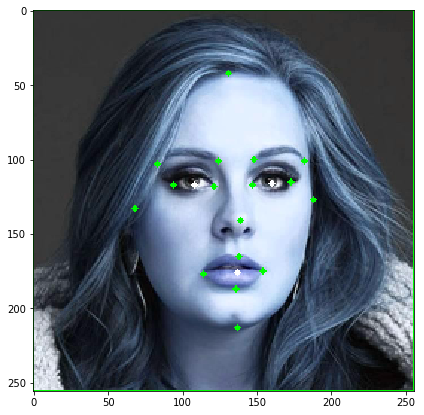

In [137]:
newx, newy = 256, 256
image_square_resize = cv2.resize(image_square_resize,(newx,newy))

coords_new_resize = coords_new.copy()

coords_new_resize[:,1:2] = (newy / image_square.shape[1]) * coords_new[:,1:2]
coords_new_resize[:,0:1] = (newx / image_square.shape[0]) * coords_new[:,0:1]


for i, coord in enumerate(coords_new_resize):
    if i in range(17,20):
        x = int(coord[0])
        y = int(coord[1])
        cv2.circle(image_square_resize, (x, y), 2, (255, 255, 255), -1)
        
    else:
        x = int(coord[0])
        y = int(coord[1])
        cv2.circle(image_square_resize, (x, y), 2, (0, 255, 0), -1)
        #cv2.putText(image, str(i), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255))
        
plt.figure(figsize = (7,7))
plt.imshow(image_square_resize)


## Crop, Scale and Affine Transform All Images

Now we have gone through this with one example, lets create two functions, one to crop and scale and the other to affine transform. We can then iterate over all the images, calling these functions to transform and then saving new instances of the transformed image files.

For reference on the affine transofmration function below, refer to the notebook on affine transformation. 

In [67]:
def affine_transform(file, image, coords_df, to_affine_coords):
    
    # extract affine coords to:
    coords = coords_df.loc[file].to_numpy().reshape(20,2)
    cle_from = coords[17:18]
    cre_from = coords[18:19]
    cm_from = coords[19:20]
    from_affine_trans_coords = [cle_from, cre_from, cm_from]
    from_affine_trans_coords = np.float32(from_affine_trans_coords)
    
    # affine transform image
    matrix = cv2.getAffineTransform(from_affine_trans_coords, to_affine_trans_coords)
    cols, rows = image.shape[0], image.shape[1]
    result = cv2.warpAffine(image, matrix, (cols, rows))
    
    # affine transform coordinates
    coords = np.float32(coords_df.loc[file]).reshape(20,2)
    coords_affine = np.matmul(matrix, (np.append(coords, np.ones((20,1)), axis=1)).T).T
    
    return result, coords_affine


def crop_scale(file, image, coords_df):
    
    coords = coords_df.loc[file].to_numpy().reshape(20,2)
    
    # landmark min/max
    xmin, xmax = int(coords[:,:1].min()), int(coords[:,:1].max())
    ymin, ymax = int(coords[:,1:].min()), int(coords[:,1:].max())
    
    # scaling
    horiz_scale = 0.5
    vert_scale = 0.5
    
    # find origin and width of crop
    crop_width = (xmax - xmin) * (1.0 + horiz_scale)
    crop_height = (ymax - ymin) * (1.0 + vert_scale)
    crop_square = int(max(crop_width, crop_height))

    xmin_new = int(((xmin+xmax)/2.0)) - int(crop_square/2.0)
    xmax_new = int(((xmin+xmax)/2.0)) + int(crop_square/2.0)
    ymin_new = int(((ymin+ymax)/2.0)) - int(crop_square/2.0)
    ymax_new = int(((ymin+ymax)/2.0)) + int(crop_square/2.0)

    # crop image
    image_crop = image[max(ymin_new,0):ymax_new, max(xmin_new,0):xmax_new]

    # add black padding and size to square
    image_square = np.zeros((crop_square,crop_square,3), np.uint8)
    image_square[0:min(image_crop.shape[0],crop_square),0:min(image_crop.shape[1],crop_square)] = image_crop[:,:]
    
    # resize image
    newx, newy = 256, 256
    image_square_resize = cv2.resize(image_square,(newx,newy))
    
    # transformed coordinates
    coords_new = + coords - [max(xmin_new,0), max(ymin_new,0)]
    coords_new[:,1:2] = (newy / image_square.shape[1]) * coords_new[:,1:2]
    coords_new[:,0:1] = (newx / image_square.shape[0]) * coords_new[:,0:1]
    
    return image_square_resize, coords_new


In [118]:
# define new directories
images_faces = 'images_A'
images_caricatures = 'images_B'
coords_faces = 'coords_A'
coords_caricatures = 'coords_B'

if not os.path.exists(images_faces):
    os.mkdir(images_faces)
if not os.path.exists(images_caricatures):
    os.mkdir(images_caricatures)
if not os.path.exists(coords_faces):
    os.mkdir(coords_faces)
if not os.path.exists(coords_caricatures):
    os.mkdir(coords_caricatures)

# create folder mappings
folder_map = {'images_A_pre':[images_faces, coords_faces, coords_faces + '.csv', coord_faces_df] , 
              'images_B_pre':[images_caricatures, coords_caricatures, coords_caricatures + '.csv', coord_cari_df]}

for pre_folder in list(folder_map.keys()):
    coord_dict = {}
    image_dict = {}
    for file in os.listdir(pre_folder):
        if file != '.DS_Store':

            # read image, crop and scale
            image = cv2.imread(pre_folder + '/' + file)
            image_square_resize, coords_new = crop_scale(file, image, folder_map[pre_folder][3])

            # record_coord
            coord_dict[file] = coords_new.ravel()
            image_dict[file] = image_square_resize
            
    # affine transofmration to coordinates
    coord_df = pd.DataFrame(coord_dict).transpose()
    coord_df = coord_df.sort_index()

    cle_mean_x = coord_df.to_numpy().reshape(coord_df.shape[0], 20, 2)[:,17:20,:][:,0:1,0:1].mean()
    cle_mean_y = coord_df.to_numpy().reshape(coord_df.shape[0], 20, 2)[:,17:20,:][:,0:1,1:2].mean()
    cre_mean_x = coord_df.to_numpy().reshape(coord_df.shape[0], 20, 2)[:,17:20,:][:,1:2,0:1].mean()
    cre_mean_y = coord_df.to_numpy().reshape(coord_df.shape[0], 20, 2)[:,17:20,:][:,1:2,1:2].mean()
    cm_mean_x = coord_df.to_numpy().reshape(coord_df.shape[0], 20, 2)[:,17:20,:][:,2:3,0:1].mean()
    cm_mean_y = coord_df.to_numpy().reshape(coord_df.shape[0], 20, 2)[:,17:20,:][:,2:3,1:2].mean()

    cle_to = cle_mean_x, cle_mean_y
    cre_to = cre_mean_x, cre_mean_y
    cm_to = cm_mean_x, cm_mean_y

    to_affine_trans_coords = [cle_to, cre_to, cm_to]
    to_affine_trans_coords = np.float32(to_affine_trans_coords)
            
    # empty dict for affine transformed coordinates
    coord_affine_dict = {}
    image_affine_dict = {}
    
    # save copy of croped faces for later example
    if pre_folder == 'images_A_pre':
        img_faces_dict = image_dict;
        
    
    
    for file in os.listdir(pre_folder):
        if file != '.DS_Store':
            image = image_dict[file]

            result, coords_affine = affine_transform(file, image, coord_df, to_affine_trans_coords)

            # store images
            #image_affine_dict[file] = result
            cv2.imwrite(folder_map[pre_folder][0]+'/'+file, result)

            # add processed coords to dict
            coord_affine_dict[file] = coords_affine.ravel()

    # create csv file of all processed coords
    coord_affine_df = pd.DataFrame(coord_affine_dict).transpose()
    coord_affine_df = coord_affine_df.sort_index()
    coord_affine_df.to_csv(folder_map[pre_folder][1] + '/' +  folder_map[pre_folder][2])

## Checks

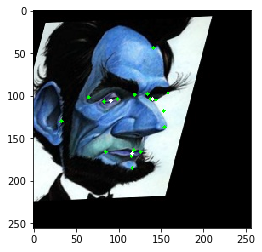

In [119]:
file = 'abraham_lincoln_C00001.jpg'
image = cv2.imread('images_B/' + file)
coords = coord_affine_df.loc[file].to_numpy().reshape(20,2)

for i, coord in enumerate(coords):
    if i in range(17,20):
        x = int(coord[0])
        y = int(coord[1])
        cv2.circle(image, (x, y), 2, (255, 255, 255), -1)
        
    else:
        x = int(coord[0])
        y = int(coord[1])
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

plt.imshow(image);

### Visual Check - Mean Face Before and After Affine Transformation

We would expect the mean face to be clearer after the affine transformation as all the faces have been aligned to the three defined points.

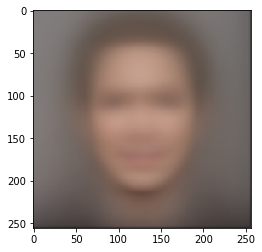

In [121]:
imgs = [file_i
         for file_i in list(img_faces_dict.values())]

data = np.array(imgs)

mean_face = np.mean(data, axis = 0)
mean_face = mean_face.astype(np.uint8)
mean_face = cv2.cvtColor(mean_face, cv2.COLOR_RGB2BGR)

plt.imshow(mean_face);

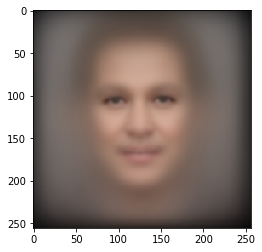

In [122]:
files = [file_i
         for file_i in os.listdir('images_A')
         if file_i.endswith('.jpg')]

imgs = [cv2.imread(os.path.join('images_A/',image_path)) 
        for image_path in files]

data = np.array(imgs)


mean_face_affine = np.mean(data, axis = 0)
mean_face_affine = mean_face_affine.astype(np.uint8)
mean_face_affine = cv2.cvtColor(mean_face_affine, cv2.COLOR_RGB2BGR)

plt.imshow(mean_face_affine);